In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("publisher-analyzed.csv")

In [4]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline-length,news_type
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A,7,Earnings Reports and Market Sessions
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A,7,Earnings Reports and Market Sessions
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A,5,Earnings Reports and Market Sessions
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A,7,Earnings Reports and Market Sessions
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A,14,Stock Price Targets and Analyst Ratings


In [5]:
# Set 'date' as the index
data.set_index('date', inplace=True)
data.index = pd.to_datetime(data.index) 

### The above code make 'date' column as the index of the DataFrame and converts it to a "DateTIme" object. This facilitates time-based indexing and operations, making it easier to perform date-specific analyses and visualizations.

In [6]:
data=data.drop(columns="Unnamed: 0",axis=1)

In [7]:
data

,headline,url,publisher,stock,headline-length,news_type
date,,,,,,
2020-06-05 10:30:54,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,7,Earnings Reports and Market Sessions
2020-06-03 10:45:20,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,7,Earnings Reports and Market Sessions
2020-05-26 04:30:07,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,5,Earnings Reports and Market Sessions
2020-05-22 12:45:06,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,7,Earnings Reports and Market Sessions
2020-05-22 11:38:59,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,14,Stock Price Targets and Analyst Ratings
...,...,...,...,...,...,...
2011-08-29 00:00:00,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX,7,Other
2011-06-22 00:00:00,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX,7,Earnings Reports and Market Sessions
2011-06-21 00:00:00,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX,8,Market Updates and Share Announcements


In [8]:
daily_counts = data.resample('D').size()

### the above code resample the data to daily frequency and count the number of entries per day

In [9]:
daily_counts

date
2009-02-14      1
2009-02-15      0
2009-02-16      0
2009-02-17      0
2009-02-18      0
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Freq: D, Length: 4136, dtype: int64

In [10]:
# Resample the data by week and count the number of articles per week
weekly_counts = data.resample('W').size()

In [21]:
weekly_counts

date
2009-02-15       1
2009-02-22       0
2009-03-01       0
2009-03-08       0
2009-03-15       0
              ... 
2020-05-17    4379
2020-05-24    3568
2020-05-31    3162
2020-06-07    3528
2020-06-14    2919
Freq: W-SUN, Length: 592, dtype: int64

### the above code resample the data to weekly frequency and count the number of entries per week

In [12]:
monthly_counts = data.resample('M').size()

### the above code resample the data to monthly frequency and count the number of entries per week

In [13]:
monthly_counts

date
2009-02-28        1
2009-03-31        0
2009-04-30        3
2009-05-31       12
2009-06-30       40
              ...  
2020-02-29    18879
2020-03-31    24994
2020-04-30    20757
2020-05-31    17992
2020-06-30     6447
Freq: M, Length: 137, dtype: int64

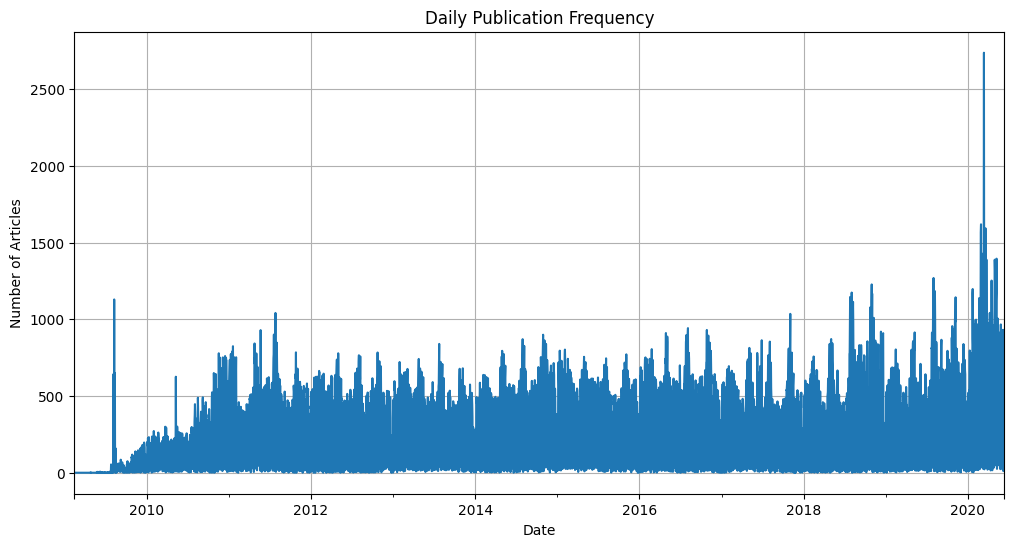

In [14]:
# Plot Daily Publication Frequency
plt.figure(figsize=(12, 6),)
daily_counts.plot()
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

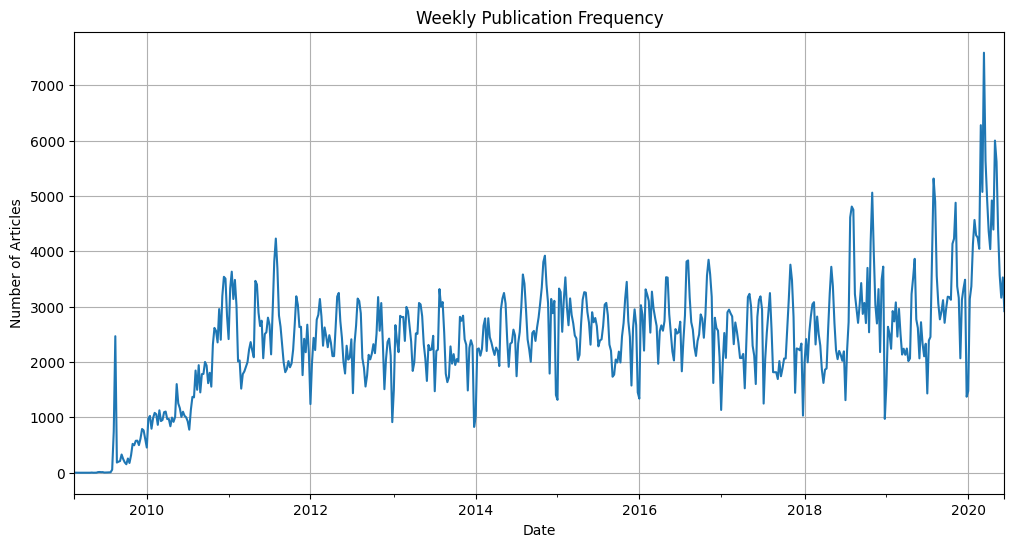

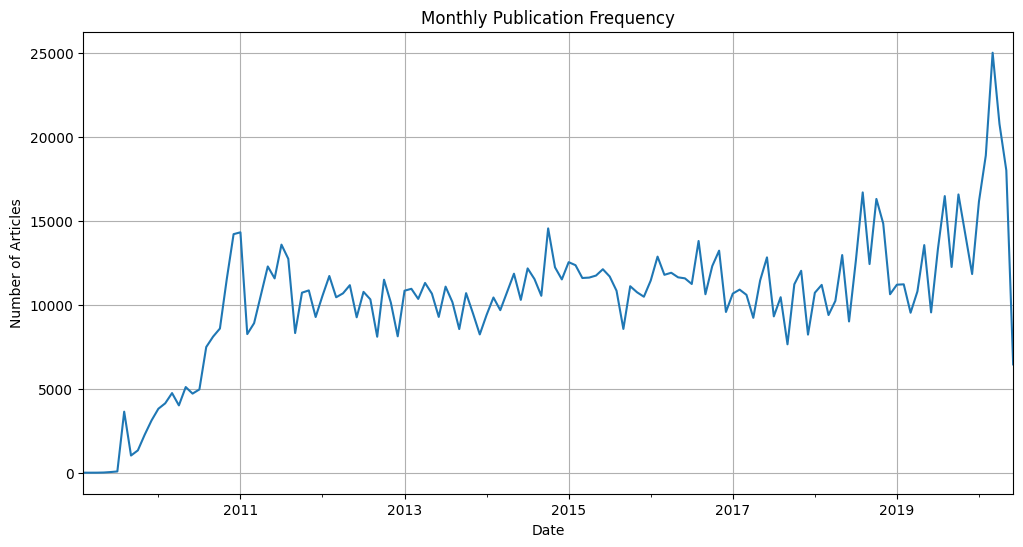

In [15]:
# Plot Weekly and Monthly Publication Frequency
plt.figure(figsize=(12, 6))
weekly_counts.plot()
plt.title('Weekly Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Monthly Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

### The first graph illustrates the weekly counts of entries from February 2009 to June 2020. Key observations include:
####  Early Periods: There were relatively low counts of entries in the early months of the dataset, with some months having very few entries (e.g., 1 entry in February 2009).
#### Increase Over Time: A significant increase in entries is observed from mid-2009 onwards, peaking in early 2020. This suggests a growing volume of data or activity over time.
#### Recent Decline: After reaching peak counts in early 2020, there is a noticeable decline in entries, with counts decreasing sharply in the following months.

### The second graph represents the monthly counts of entries from February 2009 to June 2020. Key observations include:
#### Early Trends: The data shows a gradual increase in counts from early 2009, with early months having low counts (e.g., 1 entry in February 2009 and 0 in March 2009).
#### Growth Over Time: There is a notable rise in counts starting from mid-2009, reaching significant peaks in early 2020, indicating a substantial growth in the volume of entries.
#### Recent Trends: After peaking in early 2020, the counts decrease in the following months, with a marked drop in entries by mid-2020.


In [16]:
# Identify spikes in daily publication frequency
threshold = daily_counts.mean() + 2 * daily_counts.std()  # Define a threshold for spike detection
spikes = daily_counts[daily_counts > threshold]

### The code snippet identifies spikes in daily counts by defining a threshold and then filtering the data. The threshold is calculated as the mean daily count plus twice the standard deviation:


In [17]:
spikes

date
2009-08-10    1130
2011-05-23     930
2011-07-28    1042
2016-04-28     911
2016-08-04     943
              ... 
2020-05-08     927
2020-05-13    1005
2020-05-18     914
2020-05-26     967
2020-06-05     932
Length: 93, dtype: int64

### The spike detection analysis identified several dates with unusually high daily counts. The identified spikes are:

#### Significant Events: The detected spikes span from August 2009 to June 2020, with some notable high counts including 1130 on August 10, 2009, and 1042 on July 28, 2011.
#### Frequent Occurrences: The presence of multiple spikes in recent years, such as in May 2020, indicates periods of exceptionally high activity or data entries.
#### Temporal Distribution: The spikes are distributed across various dates, suggesting sporadic high-activity periods rather than a continuous trend.

### These spikes may indicate periods of significant activity, anomalies, or special events that should be investigated further to understand their causes and implications.

In [18]:
# Extract the hour from the datetime index
data['hour'] = data.index.hour

# Count the number of articles published at each hour of the day
hourly_articles = data.groupby('hour').size()


In [19]:
# Display the hourly publication frequency
hourly_articles

hour
0     1351408
1          14
2          57
3          93
4        1469
5        1829
6        2476
7        5033
8        5527
9        5965
10       7669
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2800
18        704
19        227
20        131
21         82
22         48
23         27
dtype: int64

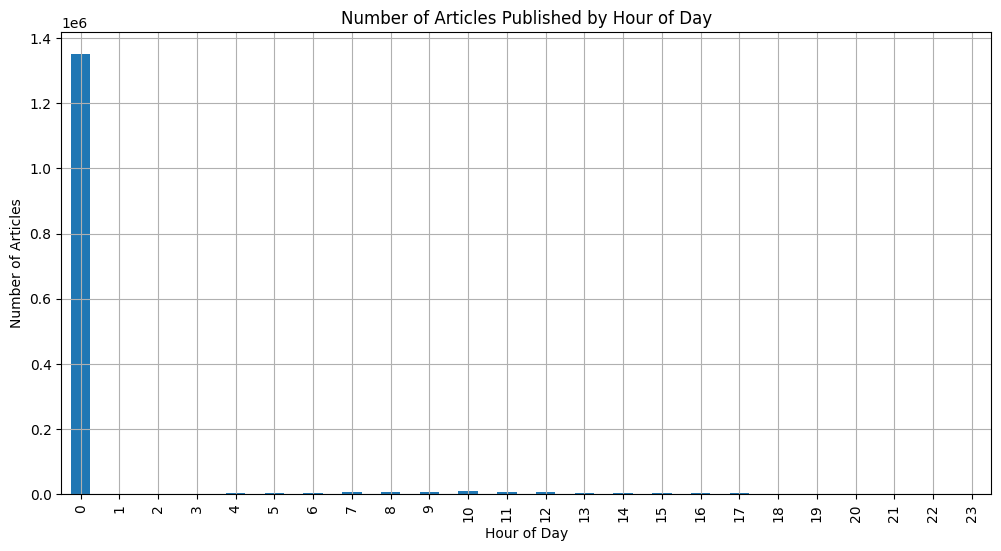

In [23]:
plt.figure(figsize=(12, 6))
hourly_articles.plot(kind='bar')
plt.title('Number of Articles Published by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

### The graph of article publication by hour shows distinct patterns:
#### Highest Volume: A significant spike is observed at hour 0 (midnight), with 1,351,408 articles published. This unusually high count may indicate a data anomaly or a major event influencing publication volumes at this hour.
#### Peak Hours: The highest number of articles during regular hours is between 8 AM and 11 AM, with the peak at 10 AM (7,669 articles). This shows a concentration of activity in the morning.
#### Low Activity: The fewest articles are published during the early morning hours (1 AM to 6 AM), with counts as low as 14 articles at 1 AM.
#### Decline in Afternoon and Evening**: Publication activity also decreases in the late afternoon and evening hours, with a drop to 27 articles by midnight.

### These observations highlight both regular publication trends and an unusual spike at midnight that warrants further investigation.

In [26]:
data=data.drop(columns="hour",axis=1)

In [27]:
data.to_csv("")

,headline,url,publisher,stock,headline-length,news_type
date,,,,,,
2020-06-05 10:30:54,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,7,Earnings Reports and Market Sessions
2020-06-03 10:45:20,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,7,Earnings Reports and Market Sessions
2020-05-26 04:30:07,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,5,Earnings Reports and Market Sessions
2020-05-22 12:45:06,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,7,Earnings Reports and Market Sessions
2020-05-22 11:38:59,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,14,Stock Price Targets and Analyst Ratings
...,...,...,...,...,...,...
2011-08-29 00:00:00,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX,7,Other
2011-06-22 00:00:00,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX,7,Earnings Reports and Market Sessions
2011-06-21 00:00:00,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX,8,Market Updates and Share Announcements
